In [99]:
from os import listdir
from os.path import isfile, join
import pandas as pd
import json
import seaborn as sns
from data 

In [131]:
result = pd.read_csv("../raw_data/input_data.csv").drop(columns="Unnamed: 0")

In [136]:
result.head()

,fichier,translation
0,0037fbb3-844e-477e-8432-bf93ab0b678c_translati...,"Création d'un AMI, ami 1 50 le lundi premier o..."
1,035ba22d-af77-42ff-9a5a-d6c0969f18cf_translati...,Créer une ami 1 50 faite au cabinet ce matin à...
2,038b4861-80a8-4615-bc74-28023bf4a62b_translati...,Ajouter une ami 1 50 à la visite de ce matin.
3,038cf73c-1508-44e9-b3b0-7d0e3a320a66_translati...,Prise de sang faite au cabinet le 22 juillet à...
4,039a13db-4d36-422b-ac3d-e1d682dac08f_translati...,Création d'un ami 1 50 réalisé à 8h00 au cabin...


In [132]:
LOCAL_PATH = "../raw_data/targets"

# monRepertoire = "Data"

# récupération des noms des fichiers output translation des memos vocaux
fichiers = [fichier for fichier in listdir(LOCAL_PATH) if isfile(join(LOCAL_PATH, fichier))]

In [175]:
# ouverture des fichiers json et récupération de la translation exemple ci dessous
    # OUTPUT MEMO VOCAL
    # {
    #    "Translation": "Une prise de sang à enregistrer sur la tournée de numéro un le 25 janvier à 8h45 sur la commune de Gémenos, 26 km montagne. Merci."
    # }

data = []
for fichier in fichiers :
    lib_fichier = LOCAL_PATH + "/" + fichier
    with open(lib_fichier) as mon_fichier:
        data.append(json.load(mon_fichier))

treatments = [data[i]["Treatments"][0]['TreatmentCares'][0]['TreatmentDetected'] for i in range(len(data))]
ngap = [data[i]["Treatments"][0]['TreatmentCares'][0]['NGAP'] for i in range(len(data))]
cotation = [data[i]["Treatments"][0]['TreatmentCares'][0]['Cotation'] for i in range(len(data))]


In [173]:
# création d'un dataframe avec nom du fichier et la phrase
df = pd.DataFrame({'fichier': fichiers, 'Treatments': data})
df.merge(result)

,fichier,Treatments,translation


In [174]:
df

,fichier,Treatments
0,2206f47b-a858-4f23-8696-d10e1050f2d7_6ad77b18-...,"{'TreatmentDetected': None, 'NGAP': 'SC', 'Cot..."
1,c619f0e1-7c22-4047-adb2-df4dec6643ba_1013078c-...,"{'TreatmentDetected': None, 'NGAP': 'PSG', 'Co..."
2,9f980dcf-b431-4e67-876f-2b8e288b7900_81de811a-...,"{'TreatmentDetected': None, 'NGAP': 'PSG', 'Co..."
3,2d035c4b-cdfa-4982-87dc-916fe07a0824_760f30f6-...,"{'TreatmentDetected': None, 'NGAP': 'PSG', 'Co..."
4,2d035c4b-cdfa-4982-87dc-916fe07a0824_6265ee25-...,"{'TreatmentDetected': None, 'NGAP': 'TAID19', ..."
...,...,...
4073,3e7ffb67-8872-4172-bf18-4fe338ecae3f_82f59fa4-...,"{'TreatmentDetected': None, 'NGAP': 'PSG', 'Co..."
4074,9f980dcf-b431-4e67-876f-2b8e288b7900_0cd87a40-...,"{'TreatmentDetected': None, 'NGAP': 'SC', 'Cot..."
4075,9d42ce6f-8537-49a9-a121-c8ae1dc7cda8_308bd1a4-...,"{'TreatmentDetected': None, 'NGAP': 'PSG', 'Co..."
4076,9f980dcf-b431-4e67-876f-2b8e288b7900_2dc62589-...,"{'TreatmentDetected': None, 'NGAP': 'ABFM', 'C..."


In [166]:
df.iloc[0,1]

{'TreatmentDetected': None,
 'NGAP': 'SC',
 'Cotation': None,
 'Hour': '10:00:00',
 'AldRelated': False}

In [171]:
print(df.iloc[0,1]["TreatmentDetected"])

None


In [167]:
df["test"] = df.iloc[:,1]["TreatmentDetected"]

KeyError: 'TreatmentDetected'

In [104]:
df['len_treatments'] = df['Treatments'].apply(lambda x: len(x))

In [107]:
df['len_treatments'].unique()

array([1, 2, 3, 4, 8, 5, 6])

<AxesSubplot:xlabel='len_treatments', ylabel='Count'>

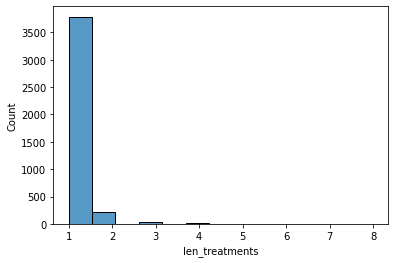

In [108]:
sns.histplot(df["len_treatments"])

In [118]:
pd.DataFrame(df.groupby("len_treatments",).count()["fichier"]).reset_index()

,len_treatments,fichier
0,1,3786
1,2,223
2,3,40
3,4,21
4,5,4
5,6,2
6,8,2


In [120]:
df = df[df["len_treatments"]==1]

In [121]:
df.iloc[1,1]

[{'TreatmentCares': [{'TreatmentDetected': None,
    'NGAP': 'PSG',
    'Cotation': None,
    'Hour': '08:00:00',
    'AldRelated': False}],
  'CareIntervals': [{'IntervalType': 'AllDays',
    'IntervalInDays': 1,
    'PassingDayOfWeek': 0,
    'PassingDate': None}],
  'CareBeginDate': '2022-02-22T08:00:00',
  'CareDuration': 1,
  'CareDurationTypeEnum': 'Days',
  'CareOnPublicHoliday': True,
  'CareLocation': 'Domicile',
  'CareBeginHpName': 'Delecluse Sabrina',
  'ZoneName': None,
  'IK': {'KilometersNumberPlain': 1,
   'KilometersNumberMontain': None,
   'KilometersNumberSpecial': None}}]

In [138]:
df["Treatments"][0]

[{'TreatmentCares': [{'TreatmentDetected': None,
    'NGAP': 'SC',
    'Cotation': None,
    'Hour': '10:00:00',
    'AldRelated': False}],
  'CareIntervals': [{'IntervalType': 'AllDays',
    'IntervalInDays': 1,
    'PassingDayOfWeek': 0,
    'PassingDate': None}],
  'CareBeginDate': '2022-02-18T10:00:00',
  'CareDuration': 15,
  'CareDurationTypeEnum': 'Days',
  'CareOnPublicHoliday': True,
  'CareLocation': 'Domicile',
  'CareBeginHpName': None,
  'ZoneName': None,
  'IK': None}]

In [139]:
df["Treatments"][0][0]

{'TreatmentCares': [{'TreatmentDetected': None,
   'NGAP': 'SC',
   'Cotation': None,
   'Hour': '10:00:00',
   'AldRelated': False}],
 'CareIntervals': [{'IntervalType': 'AllDays',
   'IntervalInDays': 1,
   'PassingDayOfWeek': 0,
   'PassingDate': None}],
 'CareBeginDate': '2022-02-18T10:00:00',
 'CareDuration': 15,
 'CareDurationTypeEnum': 'Days',
 'CareOnPublicHoliday': True,
 'CareLocation': 'Domicile',
 'CareBeginHpName': None,
 'ZoneName': None,
 'IK': None}

In [140]:
df["Treatments"][0][0]["TreatmentCares"]

[{'TreatmentDetected': None,
  'NGAP': 'SC',
  'Cotation': None,
  'Hour': '10:00:00',
  'AldRelated': False}]

In [141]:
df["Treatments"][0][0]["TreatmentCares"][0]

{'TreatmentDetected': None,
 'NGAP': 'SC',
 'Cotation': None,
 'Hour': '10:00:00',
 'AldRelated': False}

In [144]:
print(df["Treatments"][0][0]["TreatmentCares"][0]["TreatmentDetected"])

None


In [146]:
df["test"] = df.iloc[:,1][0]["TreatmentCares"][0]

TypeError: list indices must be integers or slices, not str

In [154]:
df.iloc[5,1][0]["TreatmentCares"][0]

{'TreatmentDetected': None,
 'NGAP': 'PSG',
 'Cotation': None,
 'Hour': '11:00:00',
 'AldRelated': False}